# Python Final Project 

Hypothesis Question: Does Score have a correlation with the inpendent variables of the data set? 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

aml = pd.read_csv('C:/Users/Noel~/Desktop/Untitled Folder/anime_cleaned_file.csv')

aml.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


Parts within the dataset look good from the check, took out some columns that didn't serve a purpose and was not good looking. 

In [9]:
aml.drop(['related'], axis=1, inplace = True)
aml.drop(['aired'], axis=1, inplace = True)
         
aml.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


Some more cleaning to see if there are any missing entries

In [10]:
#checking for missing anything just to be sure 

aml.columns[aml.isnull().any()]

Index(['title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'rank', 'background', 'premiered', 'broadcast', 'producer', 'licensor',
       'genre'],
      dtype='object')

We can see that out of the 33 columns there 11 of them with missing values 

# Exploratory Analysis

I am currently going to look at score and how it is distributed across each of the shows, as such I will most like use two things. Which are going to be a distribution plot from Seaborn and a Heatmap to see what kind of correlation I can see within the data when it is compared to the scores of each of the shows. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


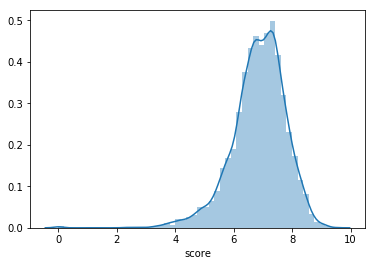

In [28]:
sns.distplot(aml['score'])

We can see that when each show there is more less a left skewed distribution but is enough to compare score to other independent variables to see if there is any correlation. 

In [35]:
#separate variables into new data frames
numeric_data = aml.select_dtypes(include=[np.number])
cat_data = aml.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in the data".format(numeric_data.shape[1],cat_data.shape[1]))


There are 10 numeric and 23 categorical columns in the data


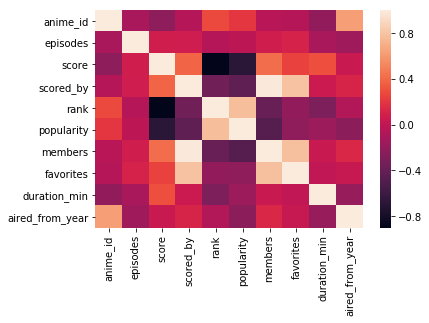

In [33]:
#Correlation Plotting 
corr = numeric_data.corr()
sns.heatmap(corr) 

We can see that within the heat map and the correlation of values that follows that there is some correlation of scores with independent variables but not as was originally foretold in the hypothesis. As such we will contiune into hypothesis testing to see if there is an actual correlation instead of just basing off of what we see.

# Hypothesis Testing 

We will be using pearson correlation to show of the 4 variables: Members, Popularity, and Favorites, will they be correlated with score and directly influence it. I will be using these 4 variables because one they are the most likely to haves some sort of correlation with the scoring of the show such as popularity and the amount of people who actual watch the shows. As well as secondly because they have some sort of influence on how the show may or may not be scored. 

In [46]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y) 
    
    return corr_mat[0,1]

# Conduct Pearson Correlation
test = pearson_r(aml['score'], aml['members'])

# Print the result
print('Pearson Correlation: {}'.format(test))

Pearson Correlation: 0.4156259247022757


In [47]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y) 
    
    return corr_mat[0,1]

# Conduct Pearson Correlation
test = pearson_r(aml['score'], aml['popularity'])

# Print the result
print('Pearson Correlation: {}'.format(test))

Pearson Correlation: -0.6884918226602827


In [48]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y) 
    
    return corr_mat[0,1]

# Conduct Pearson Correlation
test = pearson_r(aml['score'], aml['favorites'])

# Print the result
print('Pearson Correlation: {}'.format(test))

Pearson Correlation: 0.25609399955182327


We can see that within each of the 4 variables that the amount of memebers and the amount of people who favorite the show, gives the most correlation within the each of the variables. As such we can also agree with the heat map that was created that showed that those two variables are more correlated than the others based on the hypothesis. For the machine learning section of the project, I believe a random forest model will be the most useful to show how each of the pearson correlation tests were to the interpretation of the visuals. 

# Machine Learning

In [87]:
X = aml[['members', 'popularity','favorites']]
y = aml['score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5334, 3) (5334,)
(1334, 3) (1334,)


In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [89]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [90]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49162193903048473
Mean Squared Error: 0.4146704243711477
Root Mean Squared Error: 0.6439490852320141


We can see that within the random forest model that the absolute error is kind of on the higher side which would mean that within the data if there are more estimators within the data the Root Mean Squared Error would go down allowing for a more accurate test. We can also see that looking at the data and how the random foest model was played out, it shows that the data has room for improvement but as can be more accurate as time goes on. This leads to the assumption that there could be a correlation between all of these variables: memebers, popularity, and favorites, and the score of the actual show itself.

# Conclusion

    In conclusion this project would most likely be scrapped as the things that were being tested weren't the best variables to be tested. As it was going along I was lead into different problems that could have been solved by just the use of a different testing set. As for the porject as a whole, it went sort of well, I was expecting to have the score for each of the show be correlated completely with popularity and the other variables, but that was far from the truth. Yes, the variables had some sort of correlation with scores but it wasn't enough to really say there is a pure correlation for each of the variables. I would trash this project and start it with a different set of test variables to see if there is a correlation there as it was something that could help with the overall smoothness of testing. I don't really think that this sort of comparison would be suitable for a business setting as it only compares certain aspects of the data with one another without the consideration of outside forces such as, advertising, general awareness, and incentives behind watching the show. However, with that said it could be valuable to someone within a certain market as it is a perliminary data that could be used as a cog in a entire network of different smaller machine learning projects which could benefit a company. Which could also lead to a further development of the project in itself. Some of the lasting impression I had with the project was that it was interesting to learn that within itself there isn't much correlation with different variables, but it's more the outside forces that really govern the popularity and the score of the show. 